# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

In [2]:
bn = gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn, gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

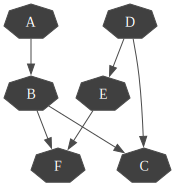

In [3]:
cr = gum.CredalNet(bn, bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(1e-10, False, False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.47151 , 0.52849] , [0.471373 , 0.528627]]

B:Range([0,1])
<A:0> : [[0.851844 , 0.148155]]
<A:1> : [[0.838713 , 0.161286]]

C:Range([0,1])
<B:0|D:0> : [[0.475124 , 0.524876] , [0.474994 , 0.525006]]
<B:1|D:0> : [[0.376467 , 0.623533] , [0.375825 , 0.624175]]
<B:0|D:1> : [[0.814865 , 0.185135] , [0.814864 , 0.185136]]
<B:1|D:1> : [[0.625365 , 0.374635] , [0.625351 , 0.374649]]

D:Range([0,1])
<> : [[0.924586 , 0.0754136]]

E:Range([0,1])
<D:0> : [[0.536533 , 0.463467] , [0.536482 , 0.463518]]
<D:1> : [[0.437852 , 0.562148] , [0.437618 , 0.562382]]

F:Range([0,1])
<E:0|B:0> : [[0.973344 , 0.0266562]]
<E:1|B:0> : [[0.469385 , 0.530615] , [0.469243 , 0.530757]]
<E:0|B:1> : [[0.47502 , 0.52498] , [0.47489 , 0.52511]]
<E:1|B:1> : [[0.182131 , 0.817869] , [0.133535 , 0.866465]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn, beta):
  cr = gum.CredalNet(bn, bn)
  cr.bnToCredal(beta, False, False)
  cr.computeBinaryCPTMinMax()
  ielbp = gum.CNLoopyPropagation(cr)
  return gnb.getInference(cr, engine=ielbp)

In [8]:
for eps in [1, 1e-1, 1e-2, 1e-3, 1e-10]:
  gnb.flow.add(showNoisy(bn, eps), caption=f"noise={eps}")
gnb.flow.display()